<a href="https://colab.research.google.com/github/velickovski/colaboratoryProjects/blob/main/Diabetes_and_Digestive_and_Kidney_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [ ]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 43.1MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

# Count the percentage of missing values in every column of the Dataset.

In [ ]:
#add your code
(df.isnull().sum() / len(df)) * 100


Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [ ]:
#add your code

df_missing = df.isna().sum().reset_index()
df_missing.columns=['Column name','Number missing values']
df_missing

,Column name,Number missing values
0,Pregnancies,14
1,Glucose,0
2,BloodPressure,0
3,SkinThickness,8
4,Insulin,0
5,BMI,10
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,0


## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

<Axes: >

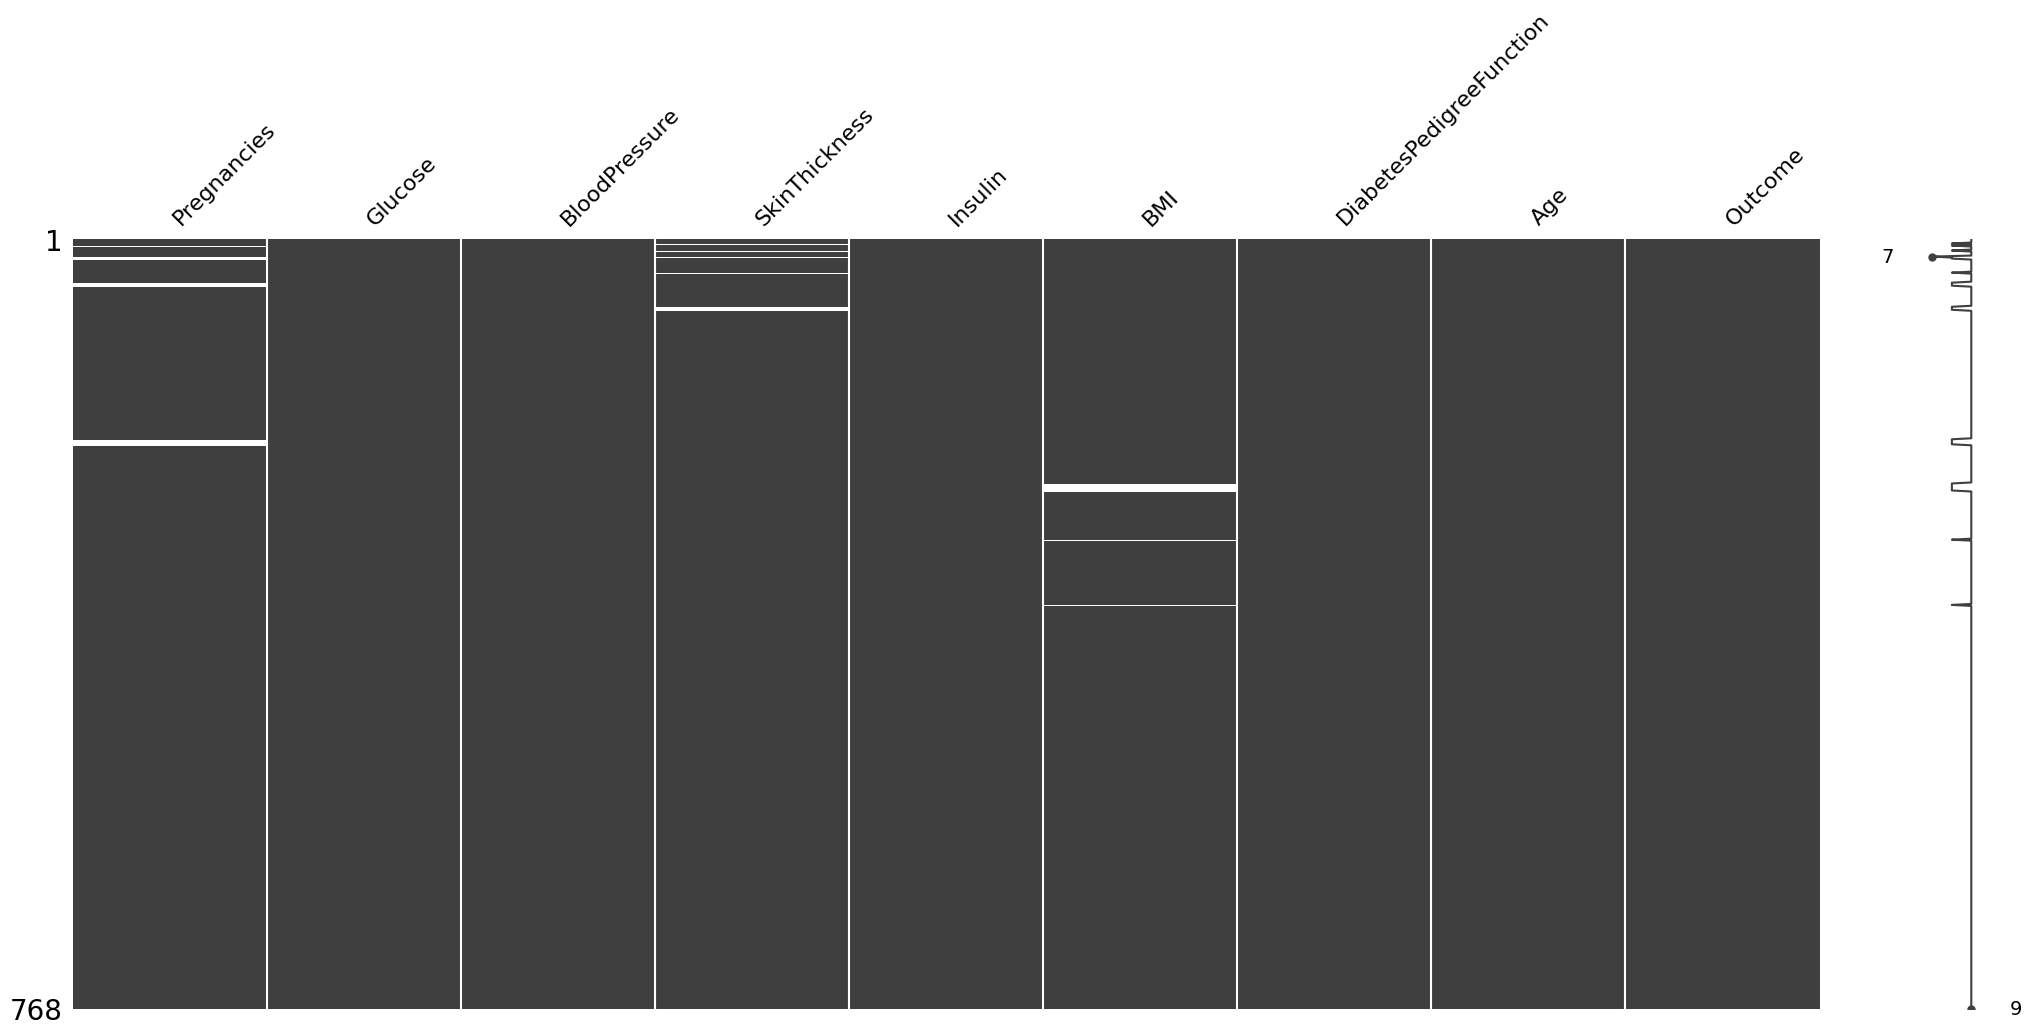

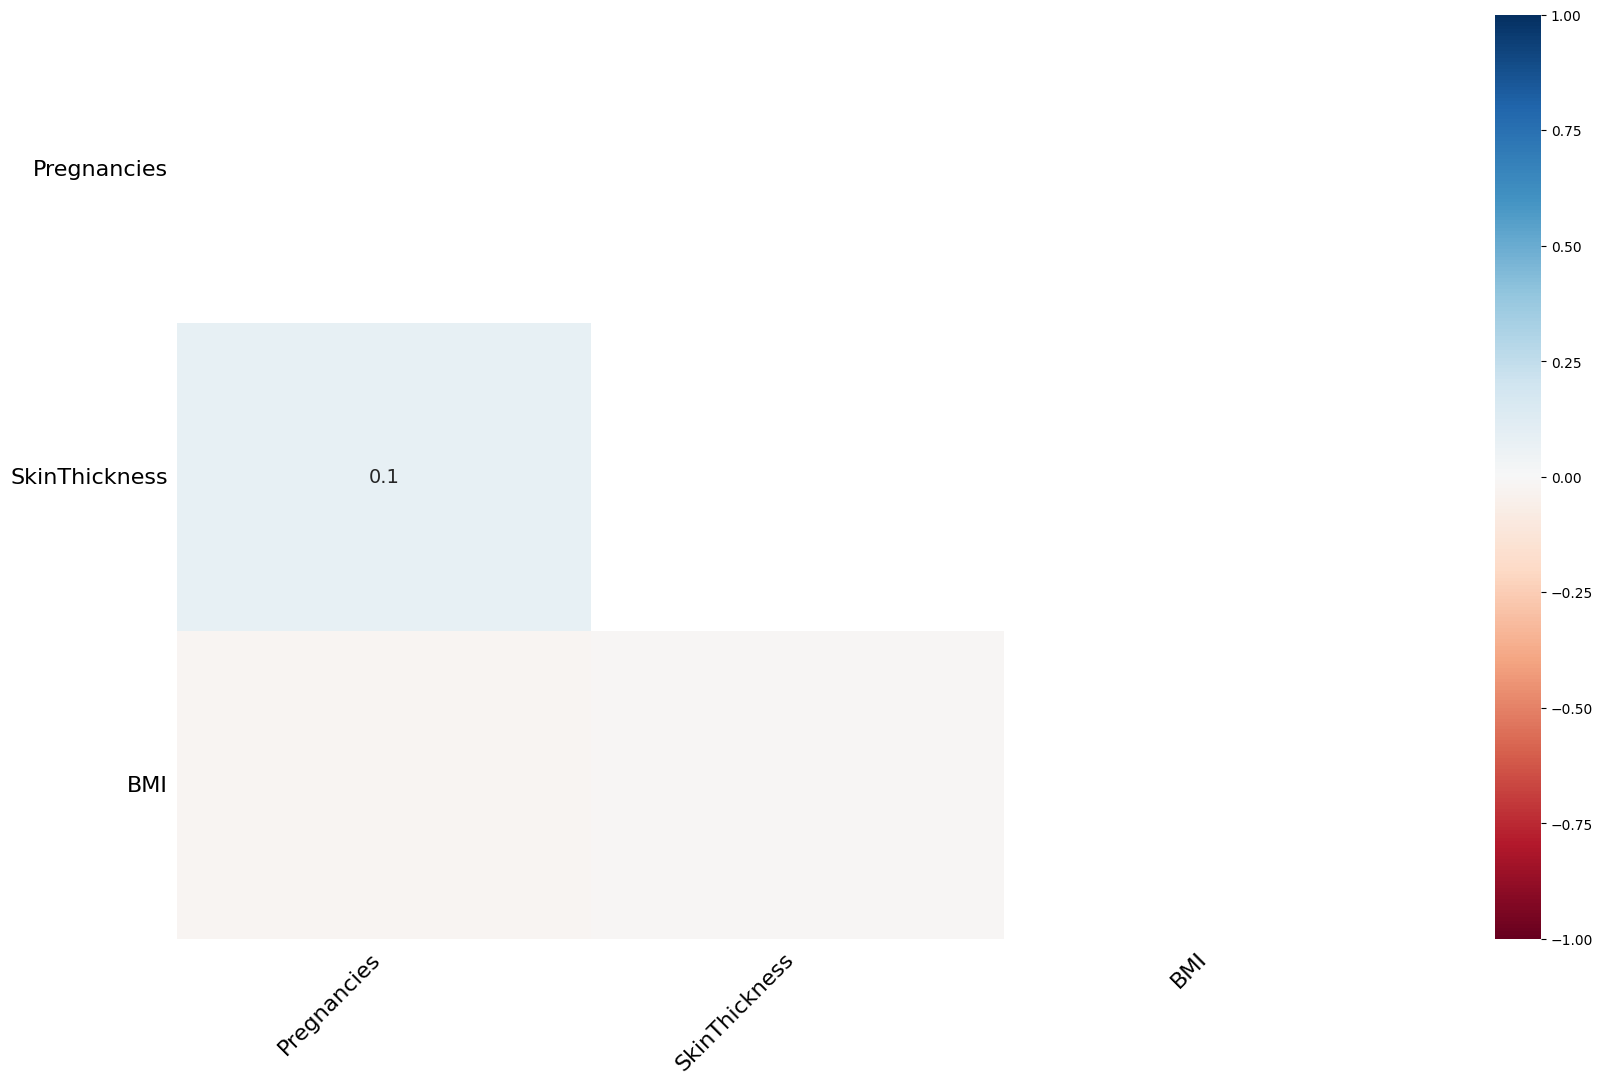

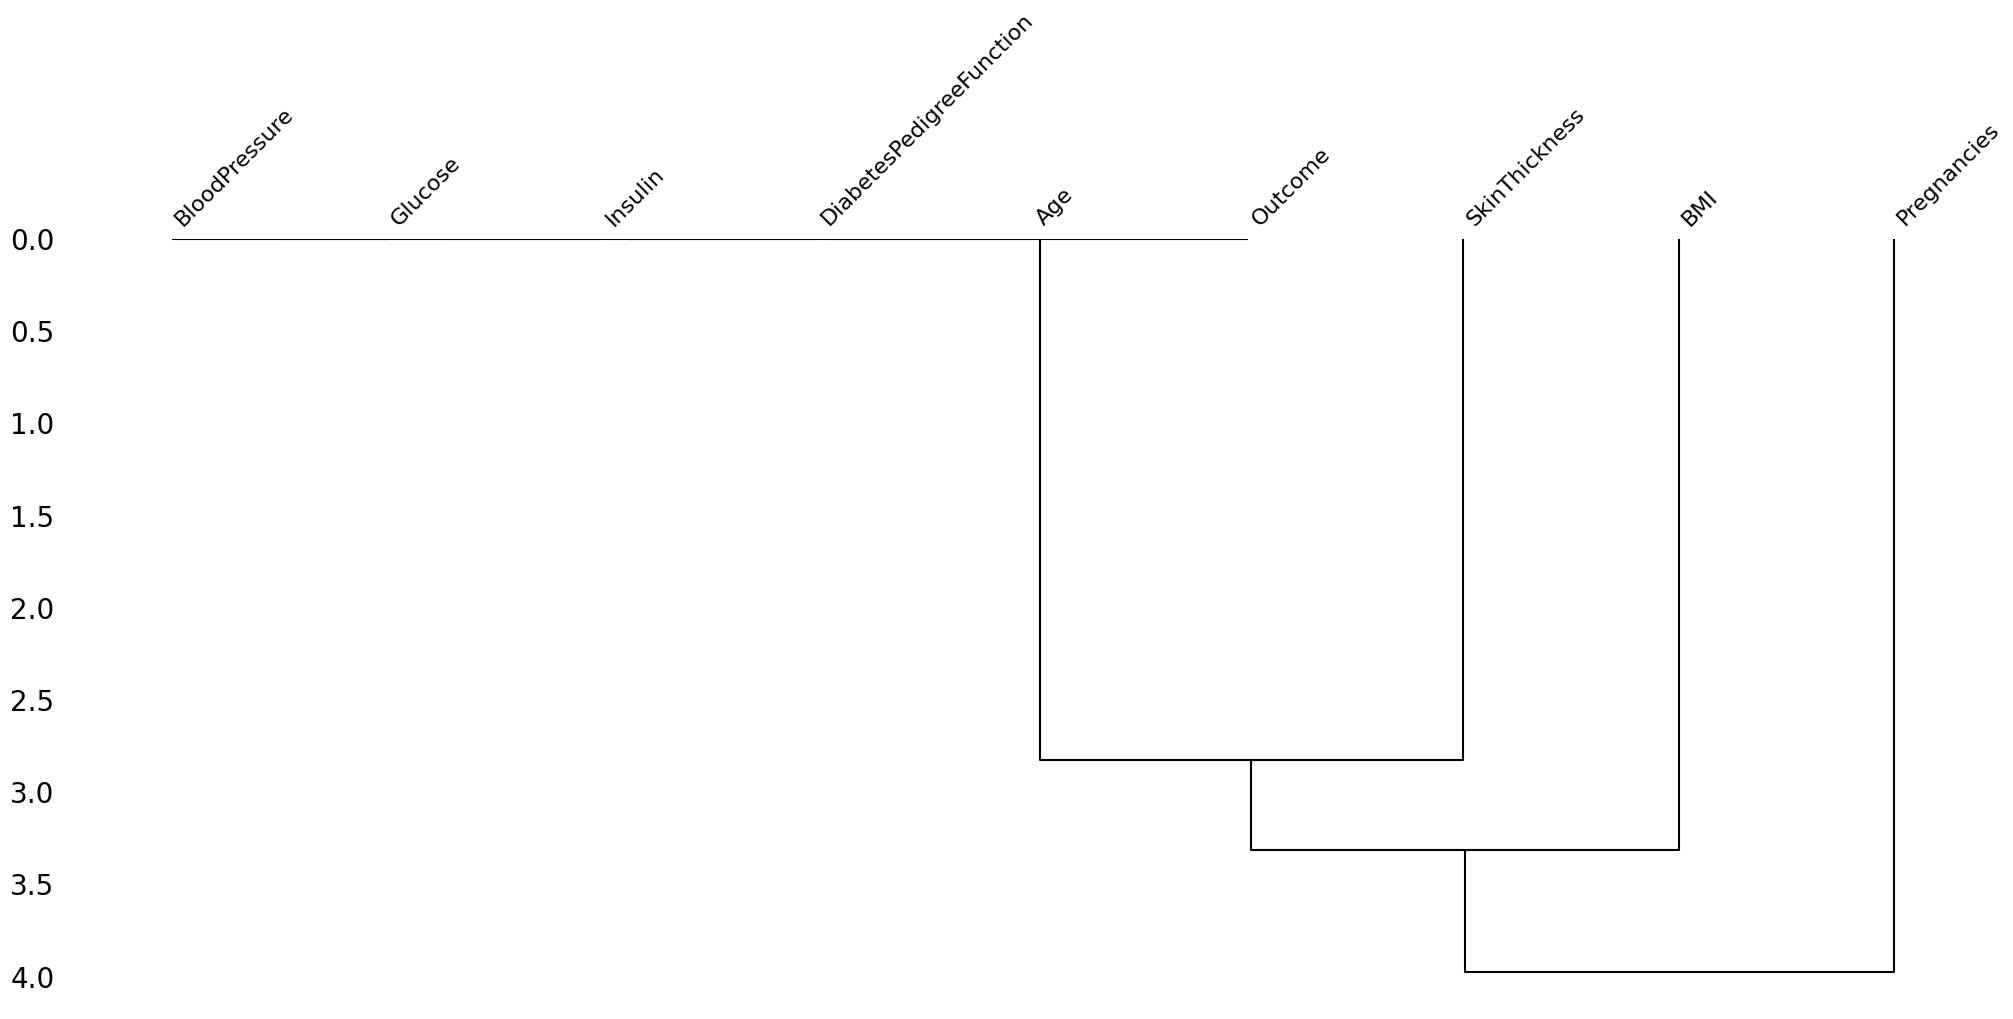

In [ ]:
 #add your code

import missingno as msno
msno.matrix(df)
msno.heatmap(df)
msno.dendrogram(df)


## <font color = 'Orange'>Handle the missing values</font>

In [ ]:
#add your code
df_copy = df.copy()
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=10)

knn.fit(df['Pregnancies'].to_numpy().reshape(-1, 1))
df_copy['Pregnancies'] = knn.transform(df['Pregnancies'].to_numpy().reshape(-1, 1))

knn.fit(df['SkinThickness'].to_numpy().reshape(-1, 1))
df_copy['SkinThickness'] = knn.transform(df['SkinThickness'].to_numpy().reshape(-1, 1))

knn.fit(df['BMI'].to_numpy().reshape(-1, 1))
df_copy['BMI'] = knn.transform(df['BMI'].to_numpy().reshape(-1, 1))

(df_copy.isnull().sum() / len(df)) * 100


Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [ ]:
#add your code
df_copy.to_csv('diabetes_imputed.csv', index=False)


Print the first rows of your final Dataset

In [ ]:
#add your code
df_copy.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [ ]:
#add your code

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
y = df_copy['Outcome']
x = df_copy.drop(columns = 'Outcome')
print(y.info())
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2)


<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB
None


## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [ ]:
#add your code
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [ ]:
#add your code
y_pred = knn.predict(X_test)


## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [ ]:
#add your code
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
f1_score(Y_test,y_pred,average='micro')
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.76      0.76       102
           1       0.54      0.54      0.54        52

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       102
           1       0.58      0.62      0.60        52

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

